In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

### Taking a look at the Data that is the New York Collisions data

In [2]:
data = pd.read_csv('NYC_Collisions/NYC_Collisions.csv')
data.head()

,Collision ID,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,NaN,40.83398,-73.826350,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,NaN,40.68730,-73.973656,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,NaN,NaN,NaN,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.88270,-73.892730,NaN,Not Reported,0.0,0,0,0,0,0,0,0
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.63791,-73.978640,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238421 entries, 0 to 238420
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Collision ID         238421 non-null  int64  
 1   Date                 238421 non-null  object 
 2   Time                 238421 non-null  object 
 3   Borough              231224 non-null  object 
 4   Street Name          238058 non-null  object 
 5   Cross Street         111291 non-null  object 
 6   Latitude             216098 non-null  float64
 7   Longitude            216098 non-null  float64
 8   Contributing Factor  237134 non-null  object 
 9   Vehicle Type         238421 non-null  object 
 10  Persons Injured      238420 non-null  float64
 11  Persons Killed       238421 non-null  int64  
 12  Pedestrians Injured  238421 non-null  int64  
 13  Pedestrians Killed   238421 non-null  int64  
 14  Cyclists Injured     238421 non-null  int64  
 15  Cyclists Killed  

### Checking how many missing data points we have

In [4]:
missing_val_count = data.isnull().sum()
data.isnull().sum()

Collision ID                0
Date                        0
Time                        0
Borough                  7197
Street Name               363
Cross Street           127130
Latitude                22323
Longitude               22323
Contributing Factor      1287
Vehicle Type                0
Persons Injured             1
Persons Killed              0
Pedestrians Injured         0
Pedestrians Killed          0
Cyclists Injured            0
Cyclists Killed             0
Motorists Injured           0
Motorists Killed            0
dtype: int64

In [5]:
total_cells = np.product(data.shape)
total_missing = missing_val_count.sum()
print("Percent of missing values :", 
      round((total_missing/total_cells)*100, 2),'%')

Percent of missing values : 4.21 %


<Axes: >

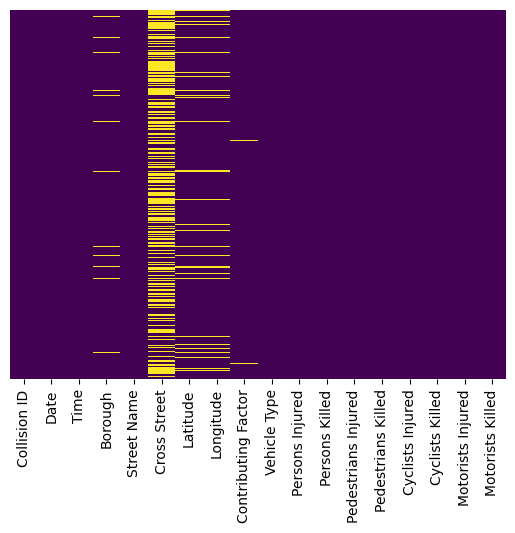

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')


### Which columns have missing data

In [8]:
data[['Borough', 'Street Name', 'Cross Street', 'Latitude',
      'Longitude', 'Contributing Factor', 'Persons Injured']].isnull().sum()

Borough                  7197
Street Name               363
Cross Street           127130
Latitude                22323
Longitude               22323
Contributing Factor      1287
Persons Injured             1
dtype: int64

In [9]:
#Making a Copy of the data
df_copy = data

### Filling in missing Values in column 'Contributing Factor'

In [10]:
df_copy['Contributing Factor'].fillna('Unspecified', inplace = True)
df_copy

,Collision ID,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,NaN,40.833980,-73.826350,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,NaN,40.687300,-73.973656,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,NaN,NaN,NaN,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.882700,-73.892730,Unspecified,Not Reported,0.0,0,0,0,0,0,0,0
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.637910,-73.978640,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238416,4619581,2023-04-09,04:21:00,Brooklyn,Meeker Avenue,NaN,40.715443,-73.951850,Failure to Yield Right-of-Way,Not Reported,1.0,0,1,0,0,0,0,0
238417,4619685,2023-04-09,08:30:00,Queens,Elbertson Street,Elmhurst Avenue,40.746864,-73.877170,Backing Unsafely,Passenger Vehicle,1.0,0,1,0,0,0,0,0
238418,4619519,2023-04-09,21:19:00,Brooklyn,Cortelyou Road,East 17 Street,40.642017,-73.962660,Unspecified,Passenger Vehicle,1.0,0,1,0,0,0,0,0
238419,4619921,2023-04-09,11:00:00,Manhattan,West 50 Street,NaN,40.763790,-73.989655,Driver Inattention/Distraction,Transport,0.0,0,0,0,0,0,0,0


In [11]:
# Handling missing values for 'Latitude' and 'Longitude' with mean
df_copy['Latitude'].fillna(df_copy['Latitude'].mean(), inplace=True)
df_copy['Longitude'].fillna(df_copy['Longitude'].mean(), inplace=True)

# For 'Cross Street', filling missing values with 'Unknown'
df_copy['Cross Street'].fillna('Unknown', inplace=True)


In [12]:
# Converting 'Date' and 'Time' to datetime
df_copy['Date'] = pd.to_datetime(df_copy['Date'])
df_copy['Time'] = pd.to_datetime(df_copy['Time'], format='%H:%M:%S').dt.time


In [13]:
# Removing duplicate rows
df_copy.drop_duplicates(inplace=True)


In [14]:
# Converting 'Date' and 'Time' to datetime
df_copy['Date'] = pd.to_datetime(df_copy['Date'])
df_copy['Time'] = pd.to_datetime(df_copy['Time'], format='%H:%M:%S').dt.time


In [15]:
# Removing duplicate rows
df_copy.drop_duplicates(inplace=True)

In [17]:
df_copy.head(15)

,Collision ID,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,Unknown,40.833980,-73.826350,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,Unknown,40.687300,-73.973656,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,Unknown,40.724492,-73.916623,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.882700,-73.892730,Unspecified,Not Reported,0.0,0,0,0,0,0,0,0
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.637910,-73.978640,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
5,4380963,2021-01-01,18:45:00,Manhattan,Harlem River Drive,Unknown,40.848630,-73.927620,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,Passenger Vehicle,0.0,0,0,0,0,0,0,0
6,4381116,2021-01-01,04:51:00,Brooklyn,Junius Street,Unknown,40.660090,-73.900550,Other Vehicular,Passenger Vehicle,0.0,0,0,0,0,0,0,0
7,4382500,2021-01-01,16:14:00,Brooklyn,Morgan Avenue,Unknown,40.705807,-73.931760,Passing Too Closely,Passenger Vehicle,0.0,0,0,0,0,0,0,0
8,4381082,2021-01-01,22:15:00,Brooklyn,Utica Avenue,East New York Avenue,40.663227,-73.931590,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
9,4381388,2021-01-01,12:00:00,Brooklyn,Elton Street,Unknown,40.671482,-73.882840,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0


In [18]:
df_copy.isnull().sum()

Collision ID              0
Date                      0
Time                      0
Borough                7197
Street Name             363
Cross Street              0
Latitude                  0
Longitude                 0
Contributing Factor       0
Vehicle Type              0
Persons Injured           1
Persons Killed            0
Pedestrians Injured       0
Pedestrians Killed        0
Cyclists Injured          0
Cyclists Killed           0
Motorists Injured         0
Motorists Killed          0
dtype: int64

In [ ]:
# Filtering outliers based on Z-scores for 'Persons Injured'
from scipy.stats import zscore[^1^][1]

z_scores = zscore(df_copy['Persons Injured'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df_copy = df_copy[filtered_entries][^2^][2]


In [ ]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [ ]:

# Create a GeoDataFrame from the DataFrame
geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
geo_data = GeoDataFrame(data, geometry=geometry, crs='EPSG:4326')

# Load street data (You need to replace this with your own street data)
streets = gpd.read_file('<path_to_your_street_shapefile>')
streets = streets.to_crs(epsg=4326) # Make sure both datasets have the same CRS

# Create a spatial index for efficient spatial queries
streets.sindex

# Perform spatial join to get cross streets
joined = gpd.sjoin(geo_data, streets, how='left', op='intersects')

# Update the 'Cross Street' column in the original DataFrame
data['Cross Street'] = joined['name'].fillna(data['Cross Street'])